In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
# from sklearn.metrics import DistanceMetric
# from sklearn.neighbors import DistanceMetric
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.shape

(768, 9)

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

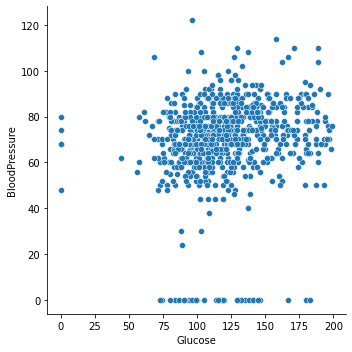

In [11]:
sns.relplot(x='Glucose',y='BloodPressure',data=df)

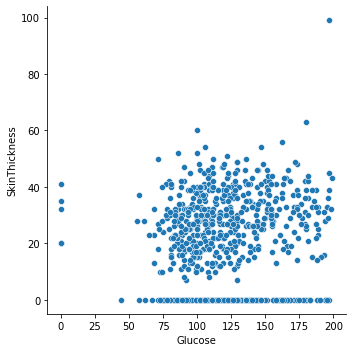

In [12]:
sns.relplot(x='Glucose',y='SkinThickness',data=df)

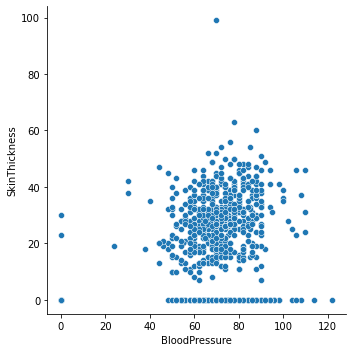

In [13]:
sns.relplot(x='BloodPressure',y='SkinThickness',data=df)

In [14]:
df.drop(df[(df['BloodPressure']== 0.0) & (df['SkinThickness'] == 0.0)].index,inplace=True,axis=0)
df.shape

(735, 9)

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,3.865306,121.006803,72.208163,21.458503,83.382313,32.298503,0.476392,33.364626,0.344218
std,3.371152,32.161949,12.928495,15.687622,116.529560,7.268129,0.333921,11.831485,0.475436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#Building the Model
from sklearn.model_selection import train_test_split
train=df.iloc[:,0:8]
test=df['Outcome']
X_train, X_test , y_train, y_test = train_test_split(train,test,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
103,1,81,72,18,40,26.6,0.283,24
526,1,97,64,19,82,18.2,0.299,21
674,8,91,82,0,0,35.6,0.587,68
520,2,68,70,32,66,25.0,0.187,25
315,2,112,68,22,94,34.1,0.315,26
...,...,...,...,...,...,...,...,...
740,11,120,80,37,150,42.3,0.785,48
199,4,148,60,27,318,30.9,0.150,29
659,3,80,82,31,70,34.2,1.292,27
584,8,124,76,24,600,28.7,0.687,52


In [18]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print("Accuracy =>",metrics.accuracy_score(y_pred,y_test))

Accuracy => 0.7687074829931972


In [20]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
y_pred1 = nb_clf.predict(X_test)
print("Accuracy =>",metrics.accuracy_score(y_pred1,y_test))

Accuracy => 0.7414965986394558


In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)
y_pred2 = kn_clf.predict(X_test)
print("Accuracy =>",metrics.accuracy_score(y_pred2,y_test))

Accuracy => 0.6802721088435374
